# Apartments for sale — real estate market analysis

## Data overview

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading csv file and assigning the result to variable
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep = '\t')

In [4]:
# displaying the head of the DataFrame
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
# printing information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [6]:
# computing a summary of statistics
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


**Conclusion**
- Change data type in columns `last_price`, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000`, `days_exposition` to int. 

- Change data type in columns `is_apartment` to bool. 

- Change data type in columns  `first_day_exposition` to datetime. 

- There are gaps in columns `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`,  `days_exposition`. These gaps probably resulted from insufficient real estate data being provided by people.

The preliminary processing of gaps:
- fill in some gaps with a logical replacement. If a person did not specify the number of balconies (`balcony`), most likely, they are not any. It is correct to replace such gaps with 0.
- fill in the gaps in `ceiling_height` with the median grouped by the area name and floor number.
- count gaps in `days_exposition`, `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` and decide whether median can replace them.  
- gaps in `is_apartment` indicate they are not apartments. Replace with False.
- replace gaops in `living_area` and `kitchen_area` with median.
- We don't need data in the columns `parks_around3000`, `ponds_around3000`. It will be left as it is.

## Data preprocessing

In [7]:
# counting gaps
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# changing 'first_day_exposition' data type to datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [9]:
# filling in the gaps with 0 and changing data type to int
data['balcony'] = data['balcony'].fillna(0).astype(int)

In [10]:
# changing data type to int
data['last_price'] = data['last_price'].astype(int)

In [11]:
# filling in the gaps with False and changing data type to boolean
data['is_apartment'] = data['is_apartment'].fillna(value=False).astype(bool)

In [12]:
# dropping records without area name and floor number
data.dropna(subset=['floors_total'], inplace=True)
data.dropna(subset=['locality_name'], inplace=True)

# changing data type to int
data['floors_total'] = data['floors_total'].astype(int)

In [13]:
# filling in the gaps in ceiling_height with median grouped by locality_name and floors_total
ceiling_height_median = data.groupby(['locality_name', 'floors_total'])['ceiling_height'].median()
data['median_ceiling_height'] = data.apply(lambda row: ceiling_height_median[row['locality_name']][row['floors_total']], axis = 1)
data['ceiling_height'] = data['ceiling_height'].fillna(data['median_ceiling_height'])

# filling in the remaining gaps in ceiling_height with median grouped by locality_name
locality_name_median = data.groupby(['locality_name'])['ceiling_height'].median()
data['median_locality_name'] = data.apply(lambda row: locality_name_median[row['locality_name']], axis = 1)
data['ceiling_height'] = data['ceiling_height'].fillna(data['median_locality_name'])

# filling in the remaining gaps in ceiling_height with the median grouped by floors_total
floors_total_median = data.groupby(['floors_total'])['ceiling_height'].median()
data['median_floors_total'] = data.apply(lambda row: floors_total_median[row['floors_total']], axis = 1)
data['ceiling_height'] = data['ceiling_height'].fillna(data['median_floors_total'])

In [14]:
# deleting unnecessary columns
data = data.drop(columns=['median_ceiling_height', 'median_locality_name', 'median_floors_total'])

In [15]:
# fill in the gaps in living_area and kitchen_area
# Calculate what part of the apartment on average is occupied by the living area
# then we multiply the received percentage by the total area of apartments in which there is no information on the area of ​​the dwelling
# same for kitchen area
living_area_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_area_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_area_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_area_ratio * data['total_area'], inplace=True)

In [16]:
# checking if living_area + kitchen_area <= total_area
data['area_check'] = data['living_area'] + data['kitchen_area'] <= data['total_area']
data[data['area_check'] == False]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_check
184,7,2600000,30.20,2018-02-14,1,2.650,9,26.100000,5,False,...,0,Санкт-Петербург,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0,False
424,14,11500000,98.00,2016-05-10,3,2.650,3,88.000000,3,False,...,1,Санкт-Петербург,39363.0,13270.0,0.0,NaN,0.0,NaN,90.0,False
440,8,2480000,27.11,2018-03-12,0,2.700,17,24.750000,4,False,...,2,Санкт-Петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,False
545,9,4700000,23.80,2018-12-28,1,2.700,18,20.000000,9,False,...,0,Санкт-Петербург,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0,False
551,8,3100000,31.59,2018-03-08,1,2.700,19,30.550000,2,False,...,2,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,70.0,False
601,12,5600000,53.70,2017-04-18,2,2.500,12,48.300000,5,False,...,2,Санкт-Петербург,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0,False
696,1,3364930,34.69,2014-11-27,1,2.640,25,23.430000,25,False,...,2,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0,False
1060,10,5200000,50.00,2015-11-06,2,2.700,35,39.000000,15,False,...,2,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0,False
1155,11,7000000,38.00,2019-04-09,1,3.200,5,33.000000,1,False,...,0,Санкт-Петербург,31501.0,3670.0,1.0,183.0,3.0,689.0,NaN,False
1354,14,7300000,54.50,2018-08-20,2,2.700,16,38.000000,12,False,...,2,Санкт-Петербург,51030.0,14721.0,0.0,NaN,0.0,NaN,NaN,False


In [17]:
# deleting unnecessary columns
del data['area_check']

There are 119 cases where living_area + kitchen_area exceeds total_area. Perhaps because the gaps in living_area and kitchen_area were filled with average data.

In [18]:
# checking percentage of gaps in days_exposition
nulls_percentage_days_exposition = data['days_exposition'].isnull().sum() / len(data)
display('days_exposition: {:.2%}'.format(nulls_percentage_days_exposition))

'days_exposition: 13.46%'

In [19]:
# adding the ad publication year
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
# checking the distribution of days_exposition by year
#data_grouped = data.groupby('year').agg({'days_exposition': ['count']})
#data_grouped

In [20]:
# checking the distribution of gaps in days_exposition by year
data[data['days_exposition'].isnull()].pivot_table(columns = 'year', values = 'total_area', aggfunc = 'count')

year,2014,2015,2016,2017,2018,2019
total_area,18,70,67,271,957,1788


2019 is the year with the most gaps. In 2019, more than half of the objects for sale did not have a calculated "days_exposition". Despite a smaller share in 2018, there are still many gaps. The more recent the ad, the more likely the 'days_exposition' will be missed. The object is most likely not sold and the listing isn't closed if there is a gap in this column. It's best to leave the gaps as they are. 

In [21]:
# counting gaps in airports_nearest
nulls_percentage_airports_nearest = data['airports_nearest'].isnull().sum() / len(data)
display('airports_nearest: {:.2%}'.format(nulls_percentage_airports_nearest))

# counting gaps in cityCenters_nearest 
nulls_percentage_cityCenters_nearest = data['cityCenters_nearest'].isnull().sum() / len(data)
display('cityCenters_nearest: {:.2%}'.format(nulls_percentage_cityCenters_nearest))

# counting gaps in parks_nearest
nulls_percentage_parks_nearest = data['parks_nearest'].isnull().sum() / len(data)
display('parks_nearest: {:.2%}'.format(nulls_percentage_parks_nearest))

# counting gaps in ponds_nearest
nulls_percentage_ponds_nearest = data['ponds_nearest'].isnull().sum() / len(data)
display('ponds_nearest: {:.2%}'.format(nulls_percentage_ponds_nearest))

'airports_nearest: 23.44%'

'cityCenters_nearest: 23.34%'

'parks_nearest: 65.92%'

'ponds_nearest: 61.65%'

The gaps in the columns `airports_nearest`, `cityCenters_nearest` can be filled with medians, but first examine the distribution of data based on the area names. 

As gaps in the `parks_nearest`, `ponds_nearest` make up too much of the data, filling them with median may cause distortions.

In [22]:
# checking the distribution of airports_nearest grouped by locality_name
airports_nearest_grouped = (
    data[data['airports_nearest'].isna() == False]
    .groupby('locality_name')['airports_nearest']
    .count())

airports_nearest_grouped.sort_values(ascending = False)

locality_name
Санкт-Петербург            15567
посёлок Шушары               436
Пушкин                       369
Колпино                      337
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 174
Ломоносов                    132
Кронштадт                     95
посёлок Металлострой          66
посёлок Стрельна              43
Павловск                      38
Зеленогорск                   24
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Песочный               4
посёлок Репино                 4
посёлок Александровская        2
посёлок Усть-Ижора             2
посёлок Лисий Нос              2
поселок Лисий Нос              1
посёлок Левашово               1
посёлок Петро-Славянка         1
посёлок Белоостров             1
Name: airports_nearest, dtype: int64

In [23]:
# checking the distribution of cityCenters_nearest grouped by locality_name
cityCenters_nearest_grouped = (
    data[data['cityCenters_nearest'].isna() == False]
    .groupby('locality_name')['cityCenters_nearest']
    .count())
cityCenters_nearest_grouped.sort_values(ascending = False)

locality_name
Санкт-Петербург            15591
посёлок Шушары               436
Пушкин                       368
Колпино                      337
посёлок Парголово            327
Петергоф                     201
Сестрорецк                   183
Красное Село                 174
Ломоносов                    132
Кронштадт                     95
посёлок Металлострой          66
посёлок Стрельна              43
Павловск                      38
Зеленогорск                   24
посёлок Понтонный             20
посёлок Сапёрный               6
посёлок Молодёжное             5
посёлок Песочный               4
посёлок Репино                 4
посёлок Александровская        2
посёлок Усть-Ижора             2
посёлок Лисий Нос              2
поселок Лисий Нос              1
посёлок Левашово               1
посёлок Петро-Славянка         1
посёлок Белоостров             1
Name: cityCenters_nearest, dtype: int64

For apartments outside of St. Petersburg, we do not have enough data to fill in the gaps with the median. Therefore, we will leave everything as it is.

In [24]:
# checking for gaps
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
year                        0
dtype: int64

**Conclusion**

- Gaps in the `airports_nearest`, `cityCenters_nearest`, `days_exposition` were left alone. 

- Gaps have been filled in columns `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `parks_around3000`, `ponds_around3000`, `airports_nearest`, `cityCenters_nearest`.

- Gaps in columns `parks_nearest`, `ponds_nearest` were left alone aince they make up too much of the data and filling them with median may cause distortions.

- The data types for the columns `last_price`, `floors_total`, `balcony`, `parks_around3000`, `ponds_around3000` have been changed to integers for convenience. The data type for the `is_apartment` column has been changed to boolean. The data type for the `first_day_exposition` column has been changed to datetime.

## Calculations and addition of results to the table

In [25]:
# calculating the price per square meter by dividing last_price by total_area 
data['square_meter_price'] = data['last_price'] / data['total_area']

# rounding to the nearest cent
data['square_meter_price'] = data['square_meter_price'].round(2)

In [26]:
# adding columns with day, month and year
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

In [27]:
# creating a floor-based categorization function
def floor_type(row):
    if row['floor'] == 1:
        return 'first'
    elif row['floor'] == row['floors_total']:
        return 'last'
    else:
        return 'other'

# adding floor_type column
data['floor_type'] = data.apply(floor_type, axis=1) 

In [28]:
# calculating the ratio of living space to total space (living_area_ratio)
data['living_area_ratio'] = data['living_area'] / data['total_area'] * 100

# rounding to the nearest cent
data['living_area_ratio'] = data['living_area_ratio'].round(2)

In [29]:
# calculating the ratio of kitchen space to total space (kitchen_area_ratio)
data['kitchen_area_ratio'] = data['kitchen_area'] / data['total_area'] * 100

# rounding to the nearest cent
data['kitchen_area_ratio'] = data['kitchen_area_ratio'].round(2)

**Conclusion**

- Added a `square_meter_price` column with the price per square meter;

- Added columns `weekday`, `month`, `year`;

- Added a `floor_type` column that indicates the floor number: first floor, last floor, other floor;

- Added a `living_area_ratio` column showing the ratio of the living space to the total, as well as a `kitchen_area_ratio` column showing the ratio of the kitchen space to the total.

## Exploratory data analysis

**Exploring the main parameters: area, price, rooms count, ceiling height**

In [30]:
# computing a summary of statistics
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,square_meter_price,weekday,month,living_area_ratio,kitchen_area_ratio
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,...,8030.000000,18065.000000,9036.000000,20394.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.739532,10.675875,34.592277,5.878124,10.499898,0.593677,...,490.580448,0.769499,518.289509,180.741395,2017.371016,9.940584e+04,2.567367,6.401570,56.543260,18.618499
std,5.681156,1.091093e+07,35.657060,1.078591,1.022573,6.594823,22.373679,4.871485,6.037750,0.960660,...,341.572956,0.938669,278.009558,219.732782,1.037393,5.038943e+04,1.788279,3.492948,10.107066,6.954479
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,2014.000000,1.118300e+02,0.000000,1.000000,2.160000,2.540000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,45.000000,2017.000000,7.656613e+04,1.000000,3.000000,50.000000,13.670000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.000000,1.000000,503.000000,95.000000,2017.000000,9.500000e+04,3.000000,6.000000,57.120000,17.510000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.750000,16.000000,42.100000,8.000000,12.000000,1.000000,...,612.000000,1.000000,730.000000,231.000000,2018.000000,1.142132e+05,4.000000,10.000000,63.170000,22.390000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,2019.000000,1.907500e+06,6.000000,12.000000,100.000000,78.790000


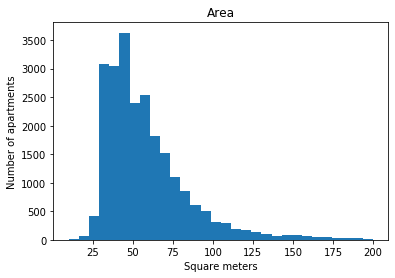

In [31]:
# visualizing the area
plt.hist(data['total_area'], bins = 30, range = (10, 200))
plt.title('Area')
plt.xlabel('Square meters')
plt.ylabel('Number of apartments')
plt.show()

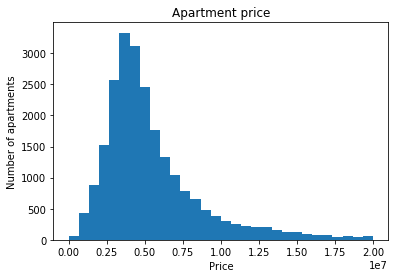

In [32]:
# visualizing the apartment prices
plt.hist(data['last_price'], bins = 30, range = (0,20000000))
plt.title('Apartment price')
plt.xlabel('Price')
plt.ylabel('Number of apartments')
plt.show()

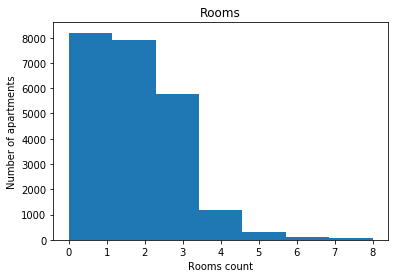

In [33]:
# visualizing rooms count
plt.hist(data['rooms'], bins = 7, range=(0, 8))
plt.title('Rooms')
plt.xlabel('Rooms count')
plt.ylabel('Number of apartments')
plt.show()

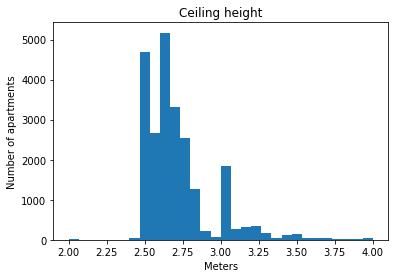

In [34]:
# visualizing ceiling height
plt.hist(data['ceiling_height'], bins = 30, range = (2, 4))
plt.title('Ceiling height')
plt.xlabel('Meters')
plt.ylabel('Number of apartments')
plt.show()

**Area**

The majority of apartments are less than 100 square meters, but there are some with areas exceeding 200 square meters.

**Price**

Apartments cost about 6 million dollars on average.

**Rooms count**

In most cases, apartments are one, two or three rooms. However, there are apartments with more than three rooms.

**Ceiling height**

In most apartments, the ceiling height is between 2.5 and 3 meters. In some apartments, there is a ceiling height of 4 meters. More than 4 meters looks suspicious. There is a value of 100 meters which may be a data error.

**Exploring time to sell an apartment**

In [89]:
# calculating the median and mean time to sell an apartment
print('Median time to sell an apartment:', round(data['days_exposition'].median()), 'days')
print('Mean time to sell an apartment:', round(data['days_exposition'].mean()), 'days')

Median time to sell an apartment: 95 days
Mean time to sell an apartment: 180 days


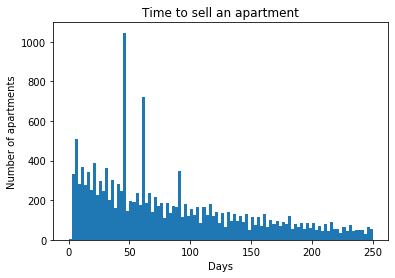

In [36]:
# visualizing time to sell an apartment
plt.hist(data['days_exposition'], bins = 100, range = (0, 250))
plt.title('Time to sell an apartment')
plt.xlabel('Days')
plt.ylabel('Number of apartments')
plt.show()

In [37]:
# computing a summary of statistics
data['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

- The median sale time is 95 days. The average sale time is 169 days.

- Most apartments are sold for a period of 100 days.

- A quick sale is 45 days or less. Long sales are 200 days and more.

- There are jumps for 45, 60 and 90 days indicating the period during which a free ad can be published on Yandex Real Estate.

- Apartments up to 4.5 million sell for 45 days, from 4.5 million to 10 million sell for 60 days, and 10 million sell for 90 days.

**Exploring outliers**

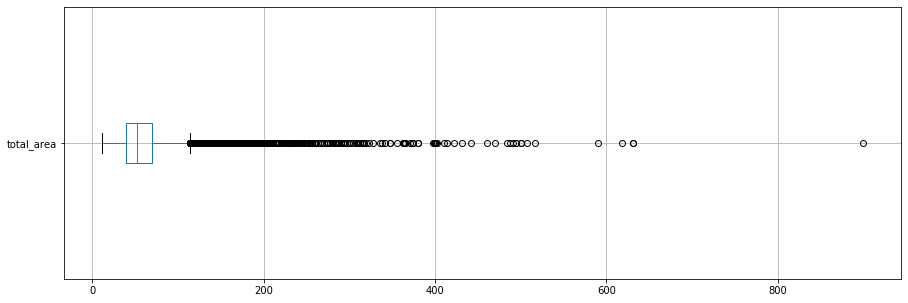

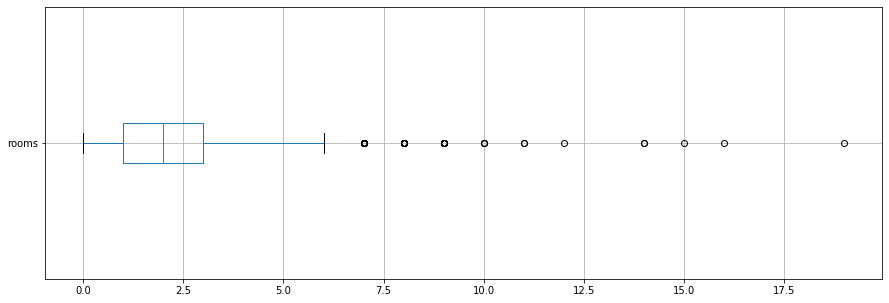

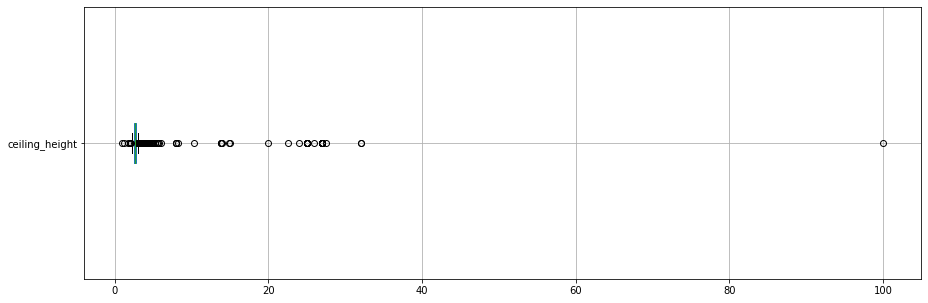

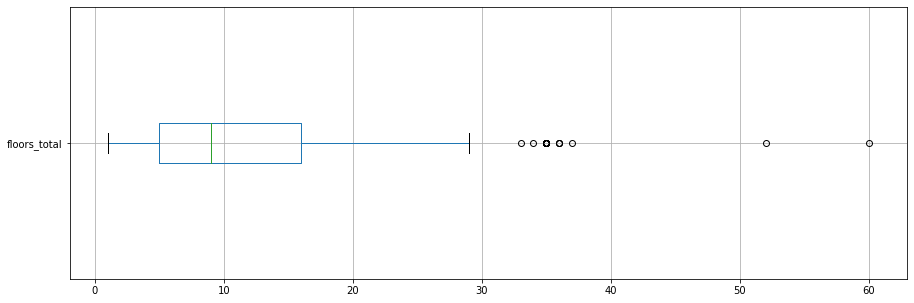

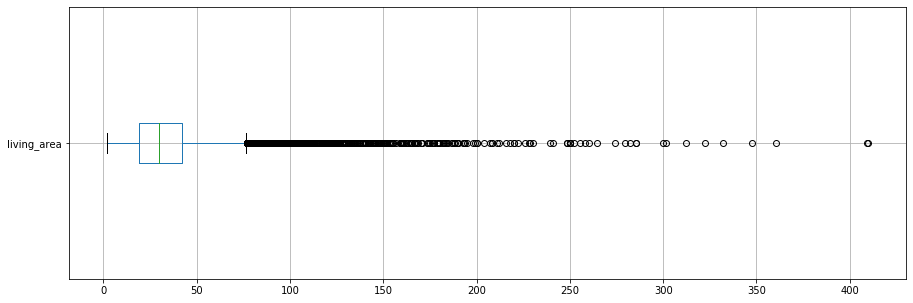

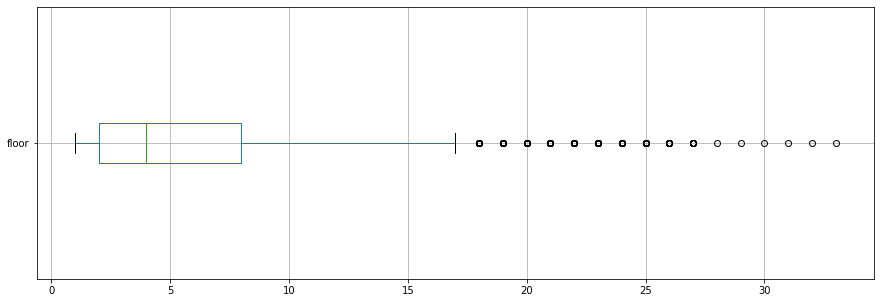

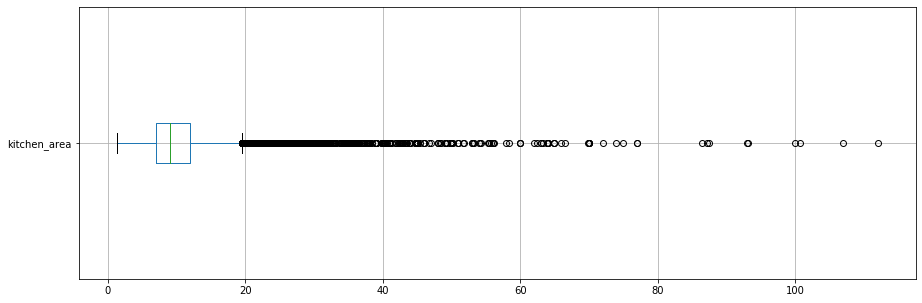

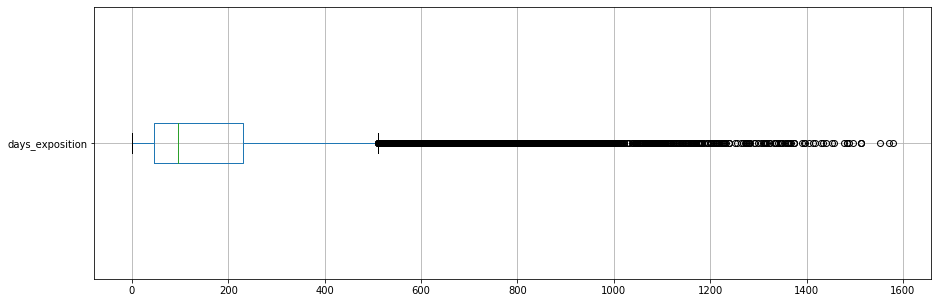

In [38]:
# visualizing outliers with boxplot
for i in ['total_area', 'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'days_exposition']:
    data.boxplot (column = [i], vert = False, figsize = (15, 5))
    plt.show()

In [39]:
# computing a summary of statistics
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,square_meter_price,weekday,month,living_area_ratio,kitchen_area_ratio
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,...,8030.000000,18065.000000,9036.000000,20394.000000,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.739532,10.675875,34.592277,5.878124,10.499898,0.593677,...,490.580448,0.769499,518.289509,180.741395,2017.371016,9.940584e+04,2.567367,6.401570,56.543260,18.618499
std,5.681156,1.091093e+07,35.657060,1.078591,1.022573,6.594823,22.373679,4.871485,6.037750,0.960660,...,341.572956,0.938669,278.009558,219.732782,1.037393,5.038943e+04,1.788279,3.492948,10.107066,6.954479
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,2014.000000,1.118300e+02,0.000000,1.000000,2.160000,2.540000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,...,288.000000,0.000000,293.000000,45.000000,2017.000000,7.656613e+04,1.000000,3.000000,50.000000,13.670000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.000000,1.000000,503.000000,95.000000,2017.000000,9.500000e+04,3.000000,6.000000,57.120000,17.510000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.750000,16.000000,42.100000,8.000000,12.000000,1.000000,...,612.000000,1.000000,730.000000,231.000000,2018.000000,1.142132e+05,4.000000,10.000000,63.170000,22.390000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,2019.000000,1.907500e+06,6.000000,12.000000,100.000000,78.790000


In [40]:
# counting number of rows in the original dataframe
data_beginning_length = len(data)
data_beginning_length

23565

In [41]:
# removing outliers from total_area
data = data[data['total_area'] < 200]
len(data)

23335

In [42]:
# removing outliers from ceiling_height
data = data[data['ceiling_height'] <= 4]
len(data)

23252

In [43]:
# removing outliers from ceiling_height
data = data[data['ceiling_height'] > 1.75]
len(data)

23249

In [44]:
# counting number of rows after removing outliers
data_final_length = len(data)
data_final_length

23249

In [45]:
# calculating the percentage of deleted data
final_length = (data_beginning_length - data_final_length) / data_beginning_length * 100
final_length

1.340971780182474

In [46]:
# computing a summary of statistics
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,year,square_meter_price,weekday,month,living_area_ratio,kitchen_area_ratio
count,23249.000000,2.324900e+04,23249.000000,23249.000000,23249.000000,23249.000000,23249.000000,23249.000000,23249.000000,23249.000000,...,7849.000000,17787.000000,8840.000000,20146.000000,23249.000000,2.324900e+04,23249.000000,23249.000000,23249.000000,23249.000000
mean,9.853542,6.012059e+06,58.100970,2.033722,2.699530,10.730354,33.261377,5.892856,10.274383,0.595423,...,491.661358,0.760724,520.630430,179.554999,2017.374511,9.838219e+04,2.565874,6.401093,56.496096,18.688462
std,5.664029,6.188784e+06,26.422683,0.995118,0.217131,6.597385,17.232194,4.879810,5.322831,0.960564,...,342.651359,0.932913,277.884914,218.383588,1.035463,4.531423e+04,1.789429,3.492106,10.073533,6.933334
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,2014.000000,1.118300e+02,0.000000,1.000000,2.160000,2.540000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.550000,5.000000,19.000000,2.000000,7.000000,0.000000,...,288.000000,0.000000,297.000000,45.000000,2017.000000,7.654321e+04,1.000000,3.000000,50.000000,13.760000
50%,9.000000,4.600000e+06,51.700000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,456.000000,0.000000,505.000000,95.000000,2017.000000,9.485531e+04,3.000000,6.000000,57.120000,17.510000
75%,14.000000,6.690000e+06,68.700000,3.000000,2.750000,16.000000,42.000000,8.000000,11.800000,1.000000,...,613.000000,1.000000,733.000000,229.000000,2018.000000,1.138535e+05,4.000000,10.000000,63.100000,22.490000
max,50.000000,3.300000e+08,199.200000,11.000000,4.000000,60.000000,164.700000,33.000000,93.200000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,2019.000000,1.736842e+06,6.000000,12.000000,100.000000,78.790000


There are 1.34 percent of outlier values in the total_area and ceiling_height columns that have been removed.

- In the total_area column, values greater than 200 square meters have been removed.
- In the ceiling_height, values less than 1.75 meters and greater than 4 meters have been removed.

**Assessing the factors that affect apartment prices such as the total area, the number of rooms, the distance to the center and the floor where the apartment is located: first, last or another. As well as the placement date, such as weekday, month and year**

Correlation of price and total area:
            total_area  last_price
total_area    1.000000    0.659854
last_price    0.659854    1.000000


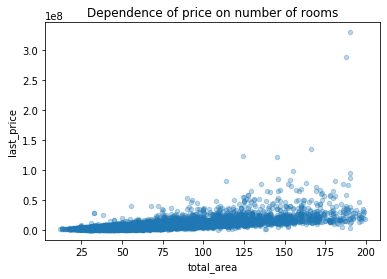

In [47]:
# assessing the impact of total area on  price
data.plot(x = 'total_area', y = 'last_price', kind = 'scatter', title = 'Dependence of price on number of rooms', alpha = 0.3)
print('Correlation of price and total area:')
print(data[['total_area', 'last_price']].corr())

Apartment prices are largely determined by the area.

Correlation of price per square meter and total area:
                    total_area  square_meter_price
total_area            1.000000            0.247193
square_meter_price    0.247193            1.000000


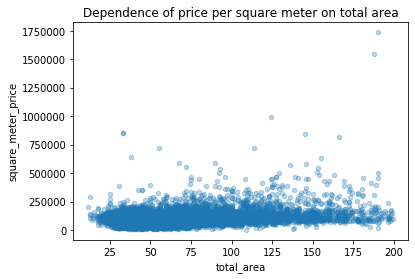

In [48]:
# assessing the impact of total area on price per square meter
data.plot(x = 'total_area', y = 'square_meter_price', kind = 'scatter', title = 'Dependence of price per square meter on total area', alpha = 0.3)
print('Correlation of price per square meter and total area:')
print(data[['total_area', 'square_meter_price']].corr())

Prices per square meter are not greatly affected by the apartment's total area.

Correlation of price and number of rooms:
               rooms  last_price
rooms       1.000000    0.380602
last_price  0.380602    1.000000


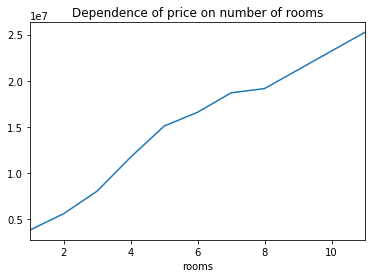

In [49]:
# assessing the impact of number of rooms on price
data.query('rooms > 0').groupby('rooms')['last_price'].agg('mean').plot(title = 'Dependence of price on number of rooms')

print('Correlation of price and number of rooms:')
print(data[['rooms', 'last_price']].corr())

As the number of rooms increases, prices rise.

Correlation of price per square and number of rooms:
                       rooms  square_meter_price
rooms               1.000000           -0.004268
square_meter_price -0.004268            1.000000


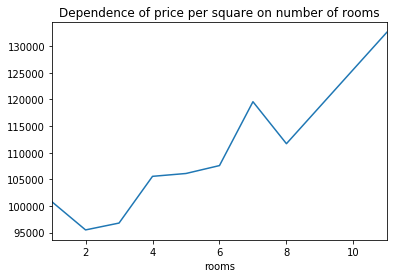

In [50]:
# assessing the impact of number of rooms on price per square meter
data.query('rooms > 0').groupby('rooms')['square_meter_price'].agg('mean').plot(
    title = 'Dependence of price per square on number of rooms')

print('Correlation of price per square and number of rooms:')
print(data[['rooms', 'square_meter_price']].corr())

A six-room apartment is the most expensive per square meter, while a three-room apartment is the cheapest.

Correlation of price and distance from the center:
                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000   -0.274419
last_price                     -0.274419    1.000000


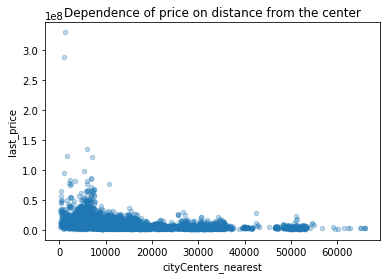

In [51]:
# assessing the impact of distance from the center on price
data.plot(x = 'cityCenters_nearest', y = 'last_price', kind = 'scatter', title = 'Dependence of price on distance from the center', alpha = 0.3)
print('Correlation of price and distance from the center:')
print(data[['cityCenters_nearest', 'last_price']].corr())

There is a mix of expensive and cheap housing in the city center. In the distance, there is mostly cheap housing.

Correlation of price per square meter and distance from the center:
                     cityCenters_nearest  square_meter_price
cityCenters_nearest             1.000000           -0.332893
square_meter_price             -0.332893            1.000000


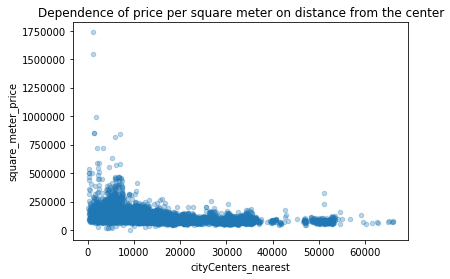

In [52]:
# assessing the impact of distance from the center on price per square meter
data.plot(
    x = 'cityCenters_nearest', 
    y = 'square_meter_price', 
    kind = 'scatter', 
    title = 'Dependence of price per square meter on distance from the center', 
    alpha = 0.3)
print('Correlation of price per square meter and distance from the center:')
print(data[['cityCenters_nearest', 'square_meter_price']].corr())

Within the city center, the price per square is both expensive and cheap. In the distance, the price per square meter is generally low.

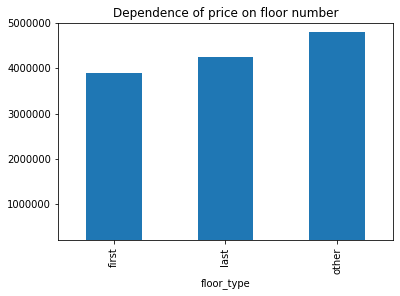

In [53]:
# assessing the impact of floor number on price
data.groupby('floor_type')['last_price'].agg('median').plot(
    kind='bar', title = 'Dependence of price on floor number', ylim = (200000, 5000000))

First-floor apartments are cheaper than those on the other floors. Middle-floor apartments are the most expensive.

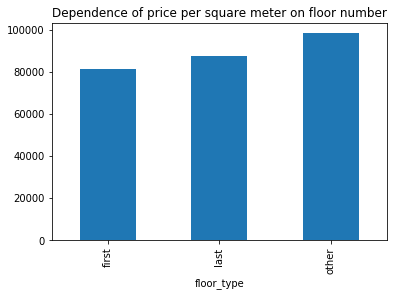

In [54]:
# assessing the impact of floor number on price per square meter
data.groupby('floor_type')['square_meter_price'].agg('median').plot(
    kind='bar', title = 'Dependence of price per square meter on floor number')

Compare to the other floors, the first floor has a lower price per square meter, while the middle floor has the highest.

Correlation of price and day of placement:
             weekday  last_price
weekday     1.000000   -0.012936
last_price -0.012936    1.000000


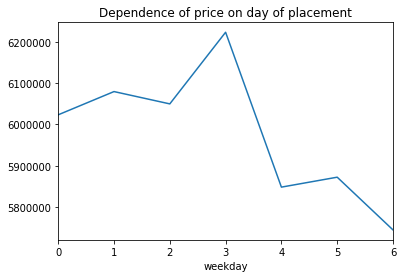

In [55]:
# assessing the impact of day of placement on price
data.groupby('weekday')['last_price'].agg('mean').plot(title='Dependence of price on day of placement')
print('Correlation of price and day of placement:')
print(data[['weekday', 'last_price']].corr())

The most expensive apartments are published on Thursday, the cheapest - on Sunday.

Correlation of price per square meter and day of placement:
                    weekday  square_meter_price
weekday             1.00000            -0.01254
square_meter_price -0.01254             1.00000


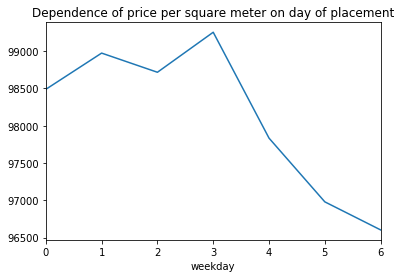

In [56]:
# assessing the impact of day of placement on price per square meter
data.groupby('weekday')['square_meter_price'].agg('mean').plot(title='Dependence of price per square meter on day of placement')
print('Correlation of price per square meter and day of placement:')
print(data[['weekday', 'square_meter_price']].corr())

The most expensive apartments are published on Thursday, the cheapest - on Sunday.

Correlation of price and month of placement:
               month  last_price
month       1.000000    0.002176
last_price  0.002176    1.000000


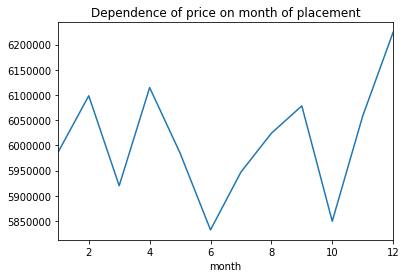

In [57]:
# assessing the impact of month of placement on price
data.groupby('month')['last_price'].agg('mean').plot(title='Dependence of price on month of placement')
print('Correlation of price and month of placement:')
print(data[['month', 'last_price']].corr())

In April and December, the most expensive apartments are sold, in June, the cheapest.

Correlation of price per square meter and month of placement:
                       month  square_meter_price
month               1.000000           -0.002841
square_meter_price -0.002841            1.000000


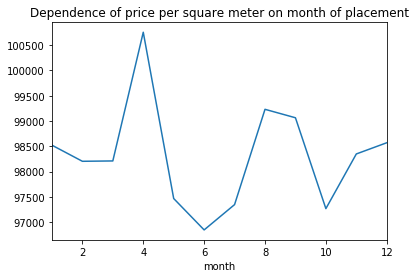

In [58]:
# assessing the impact of month of placement on price per square meter
data.groupby('month')['square_meter_price'].agg('mean').plot(title='Dependence of price per square meter on month of placement')
print('Correlation of price per square meter and month of placement:')
print(data[['month', 'square_meter_price']].corr())

The most expensive apartments are sold in April, the cheapest - in June.

Correlation of price and year of placement:
                year  last_price
year        1.000000   -0.035593
last_price -0.035593    1.000000


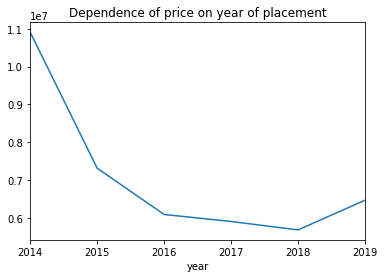

In [59]:
# assessing the impact of year of placement on price
data.groupby('year')['last_price'].agg('mean').plot(title='Dependence of price on year of placement')
print('Correlation of price and year of placement:')
print(data[['year', 'last_price']].corr())

In 2014-2018, apartment prices fell significantly. In 2019, prices began to rise again.

Correlation of price per square meter and day of placement:
                        year  square_meter_price
year                1.000000            0.024938
square_meter_price  0.024938            1.000000


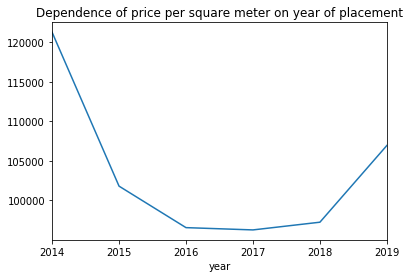

In [60]:
# assessing the impact of year of placement on price per square meter
data.groupby('year')['square_meter_price'].agg('mean').plot(
    title='Dependence of price per square meter on year of placement')
print('Correlation of price per square meter and day of placement:')
print(data[['year', 'square_meter_price']].corr())

In 2014-2018, apartment prices fell significantly. In 2019, prices began to rise again.

Apartment prices are largely determined by the area. Prices per square meter are not greatly affected by the apartment's total area.

As the number of rooms increases, prices rise. 
A six-room apartment is the most expensive per square meter, while a three-room apartment is the cheapest.

There is a mix of expensive and cheap housing in the city center. In the distance, there is mostly cheap housing.
Within the city center, the price per square is both expensive and cheap. In the distance, the price per square meter is generally low.

First-floor apartments are cheaper than those on the other floors. Middle-floor apartments are the most expensive. A similar observation can be made when examining the price per square meter.

The most expensive apartments are published on Thursday, the cheapest - on Sunday. A similar observation can be made when examining the price per square meter.

In April and December, the most expensive apartments are sold, in June, the cheapest. When examining the price per square meter, the most expensive apartments are sold in April, the cheapest - in June.

In 2014-2018, apartment prices fell significantly. In 2019, prices began to rise again. A similar observation can be made when examining the price per square meter.

**Comparing the average price per square meter in the top 10 cities**

In [61]:
# selecting 10 towns with the largest number of ads
top_ten_cities = data['locality_name'].value_counts().head(10)

In [62]:
# calculating the average price per square meter 
city_square_meter_price = (data
    .query('locality_name in (@top_ten_cities.index)')
    .pivot_table(index='locality_name', values='square_meter_price', aggfunc = 'mean')
    .round(2)
)                           
city_square_meter_price = city_square_meter_price.sort_values('square_meter_price', ascending=False)
city_square_meter_price

,square_meter_price
locality_name,
Санкт-Петербург,113436.78
Пушкин,103054.14
деревня Кудрово,92473.55
посёлок Парголово,90332.26
посёлок Мурино,85645.90
посёлок Шушары,78551.34
Колпино,75333.30
Гатчина,68757.68
Всеволожск,68605.57


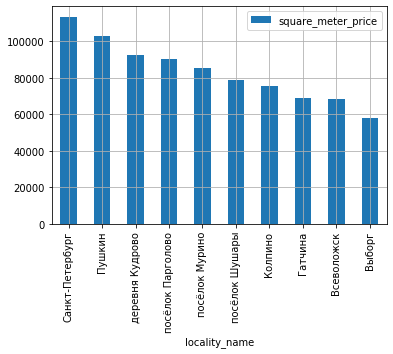

In [63]:
# visualizing
city_square_meter_price.plot(grid=True, kind = 'bar')

Of the top 10, St. Petersburg has the highest average cost per square meter. Vyborg has the lowest average cost per square meter.

**Identifying the central zone's boundary**

In [64]:
# creating a column with the distance to the center
data['km_to_center'] = data['cityCenters_nearest'] / 1000
data['km_to_center'] = data['km_to_center'].fillna(value=0).astype(int)

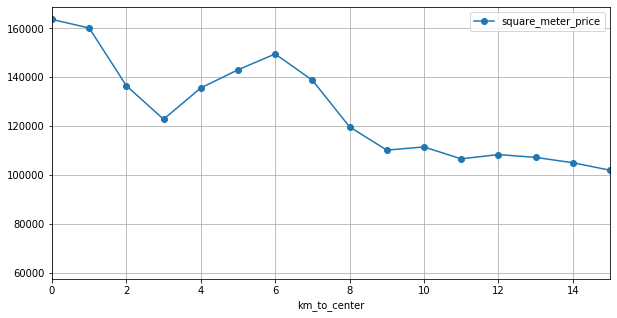

In [66]:
# plotting a graph showing how distance from the center affects 
# the average price per square meter
data.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='km_to_center', 
    values='square_meter_price', 
    aggfunc = 'mean').plot(
    grid=True, style='o-', xlim=(0,15), figsize=(10, 5))

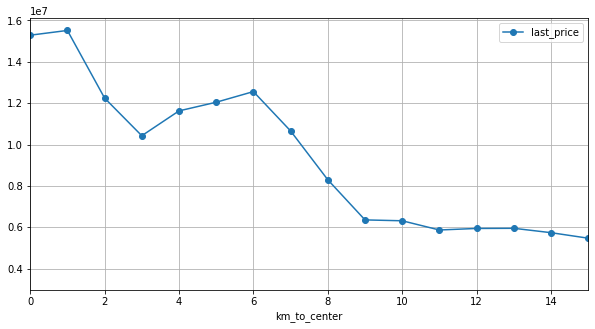

In [67]:
# plotting a graph showing how distance from the center affects 
# the average price of the apartment
data.query('locality_name == "Санкт-Петербург"').pivot_table(
    index='km_to_center', 
    values='last_price', 
    aggfunc = 'mean').plot(
    grid=True, style='o-', xlim=(0,15), figsize=(10, 5))

The central zone is defined as a radius of 7 km or less. Beyond this radius, prices per square meter and the average price of the apartment start to drop.

**Apartment analysis within the central zone**

In [68]:
# selecting apartments within the central zone
stpb = data.query('(locality_name == "Санкт-Петербург") & (km_to_center <= 7)')

# checking the median and mean
stpb.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,year,square_meter_price,weekday,month,living_area_ratio,kitchen_area_ratio,km_to_center
count,3557.00,3.557000e+03,3557.00,3557.00,3557.00,3557.00,3557.00,3557.00,3557.00,3557.00,...,3499.00,2505.00,2960.00,3557.00,3557.00,3557.00,3557.00,3557.00,3557.00,3557.00
mean,10.18,1.198322e+07,82.31,2.65,2.95,7.36,48.16,4.29,13.68,0.33,...,1.27,467.54,240.05,2017.21,140090.43,2.52,6.41,57.77,17.69,4.16
std,5.95,1.246629e+07,36.67,1.21,0.31,4.07,24.67,3.10,7.90,0.77,...,1.09,270.64,268.50,1.12,78551.86,1.73,3.46,11.05,7.94,1.82
min,0.00,1.600000e+06,12.00,0.00,2.00,2.00,2.00,1.00,2.00,0.00,...,0.00,22.00,3.00,2014.00,15345.27,0.00,1.00,2.16,2.54,0.00
25%,6.00,6.490000e+06,55.00,2.00,2.70,5.00,30.20,2.00,9.00,0.00,...,0.00,230.00,60.00,2017.00,100000.00,1.00,3.00,51.95,12.35,3.00
50%,10.00,8.780000e+06,75.00,3.00,3.00,6.00,44.00,4.00,11.60,0.00,...,1.00,457.00,135.00,2017.00,122881.36,3.00,6.00,57.97,16.19,4.00
75%,15.00,1.300000e+07,101.90,3.00,3.15,9.00,61.00,5.00,16.00,0.00,...,2.00,670.00,333.25,2018.00,153333.33,4.00,10.00,65.49,20.09,5.00
max,50.00,3.300000e+08,198.00,11.00,4.00,27.00,164.70,25.00,93.20,5.00,...,3.00,1293.00,1572.00,2019.00,1736842.11,6.00,12.00,98.34,63.70,7.00


In [69]:
# checking the median and mean in the initial dataframe
data.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,year,square_meter_price,weekday,month,living_area_ratio,kitchen_area_ratio,km_to_center
count,23249.00,2.324900e+04,23249.00,23249.00,23249.00,23249.00,23249.00,23249.00,23249.00,23249.00,...,17787.00,8840.00,20146.00,23249.00,23249.00,23249.00,23249.00,23249.00,23249.00,23249.00
mean,9.85,6.012059e+06,58.10,2.03,2.70,10.73,33.26,5.89,10.27,0.60,...,0.76,520.63,179.55,2017.37,98382.19,2.57,6.40,56.50,18.69,10.56
std,5.66,6.188784e+06,26.42,1.00,0.22,6.60,17.23,4.88,5.32,0.96,...,0.93,277.88,218.38,1.04,45314.23,1.79,3.49,10.07,6.93,9.53
min,0.00,1.219000e+04,12.00,0.00,2.00,1.00,2.00,1.00,1.30,0.00,...,0.00,13.00,1.00,2014.00,111.83,0.00,1.00,2.16,2.54,0.00
25%,6.00,3.400000e+06,40.00,1.00,2.55,5.00,19.00,2.00,7.00,0.00,...,0.00,297.00,45.00,2017.00,76543.21,1.00,3.00,50.00,13.76,2.00
50%,9.00,4.600000e+06,51.70,2.00,2.65,9.00,30.00,4.00,9.00,0.00,...,0.00,505.00,95.00,2017.00,94855.31,3.00,6.00,57.12,17.51,11.00
75%,14.00,6.690000e+06,68.70,3.00,2.75,16.00,42.00,8.00,11.80,1.00,...,1.00,733.00,229.00,2018.00,113853.50,4.00,10.00,63.10,22.49,15.00
max,50.00,3.300000e+08,199.20,11.00,4.00,60.00,164.70,33.00,93.20,5.00,...,3.00,1344.00,1580.00,2019.00,1736842.11,6.00,12.00,100.00,78.79,65.00


In [70]:
# learning about the area
print('Area (median):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].median()))
print('Area in the central zone (median):', round(stpb['total_area'].median()))
print('Area (mean):', round(data.query('locality_name == "Санкт-Петербург"')['total_area'].mean()))
print('Area in the central zone  (mean):', round(stpb['total_area'].mean()))

Area (median): 54
Area in the central zone (median): 75
Area (mean): 62
Area in the central zone  (mean): 82


In [71]:
# learning about the prices
print('Price (median):', round(data.query('locality_name == "Санкт-Петербург"')['last_price'].median()))
print('Price in the central zone (median)', round(stpb['last_price'].median()))
print('Price (mean):', round(data.query('locality_name == "Санкт-Петербург"')['last_price'].mean()))
print('Price in the central zone (mean):', round(stpb['last_price'].mean()))

Price (median): 5500000
Price in the central zone (median) 8780000
Price (mean): 7297054
Price in the central zone (mean): 11983220


In [72]:
# learning about the number of rooms
# counting apartments in St. Petersburg by the number of rooms
# calculating the percentage of apartments in St. Petersburg by the number of rooms
all_stpb_rooms = data.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
all_stpb_rooms.columns = ['all_count']
all_stpb_rooms['all_rooms_ratio'] = all_stpb_rooms['all_count'] / all_stpb_rooms['all_count'].sum() * 100

# counting apartments in the central zone by the number of rooms 
# calculating the percentage of apartments in the central zone by the number of rooms 
stpb_rooms_center = data.query('(locality_name == "Санкт-Петербург") & (km_to_center <= 7)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
stpb_rooms_center.columns = ['center_count']
stpb_rooms_center['center_rooms_ratio'] = stpb_rooms_center['center_count'] / stpb_rooms_center['center_count'].sum() * 100

# merging two tables
# calculating the percentage of apartments in the central zone from the total number of apartments 
all_rooms = pd.merge(all_stpb_rooms, stpb_rooms_center, 'left', on = 'rooms')
all_rooms['center_cap'] = round(all_rooms['center_count'] / all_rooms['all_count'] * 100)
all_rooms

,all_count,all_rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1,4900,32.068063,573,16.181870,12.0
2,5067,33.160995,1114,31.460040,22.0
3,4075,26.668848,1137,32.109574,28.0
4,929,6.079843,473,13.357809,51.0
5,229,1.498691,172,4.857385,75.0
6,56,0.366492,48,1.355549,86.0
7,20,0.130890,20,0.564812,100.0
8,2,0.013089,2,0.056481,100.0
11,2,0.013089,2,0.056481,100.0


In [73]:
# learning about the ceiling height
print('Ceiling height (median):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median())
print('Ceiling height in the central zone (median):', stpb['ceiling_height'].median())
print('Ceiling height (mean):', data.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean())
print('Ceiling height in the central zone (mean):', stpb['ceiling_height'].mean())

Ceiling height (median): 2.7
Ceiling height in the central zone (median): 3.0
Ceiling height (mean): 2.7334512900499806
Ceiling height in the central zone (mean): 2.9545543997751023


Apartments in the center are much larger than those in the rest of the city - an average of 15 meters squared.

Apartments in the center are much more expensive than in the city. On average, they cost 2.7-3.4 million.

A lower proportion of one-room apartments (12%) is found in the center than in the city average (32%). The share of two- and three-room apartments equals or is not significant, while the share of four-room apartments dominates in the center.

In the center, the ceiling height is slightly higher than in the city. 

In the center, there are many historical buildings that are different from modern buildings.

Correlation of price in the central zone and number of rooms:
               rooms  last_price
rooms       1.000000    0.380602
last_price  0.380602    1.000000


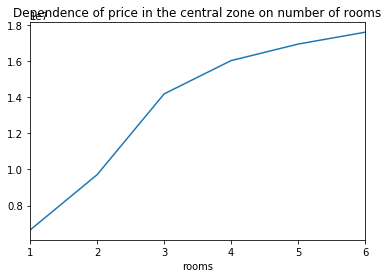

In [74]:
# assessing the impact of number of rooms on price in the central zone
stpb.query('(rooms > 0) & (rooms < 7)').groupby('rooms')['last_price'].agg('mean').plot(
    title = 'Dependence of price in the central zone on number of rooms')

print('Correlation of price in the central zone and number of rooms:')
print(data[['rooms', 'last_price']].corr())

As the number of rooms increases, the price increases.

Correlation of price per square meter in the central zone and number of rooms:
                       rooms  square_meter_price
rooms               1.000000           -0.096396
square_meter_price -0.096396            1.000000


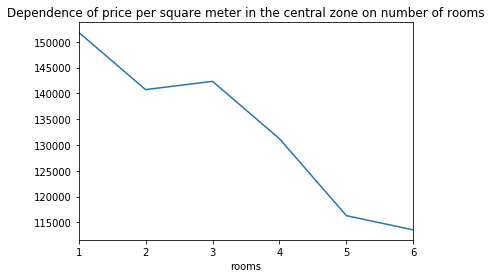

In [75]:
# assessing the impact of number of rooms on price per square meter in the central zone
stpb.query('(rooms > 0) & (rooms < 7)').groupby('rooms')['square_meter_price'].agg('mean').plot(
    title = 'Dependence of price per square meter in the central zone on number of rooms')

print('Correlation of price per square meter in the central zone and number of rooms:')
print(stpb[['rooms', 'square_meter_price']].corr())

The price per square meter decreases as the number of rooms increases. The lowest price per square is observed in apartments with 5 rooms. In an apartments with 6 rooms, the price per square increases.

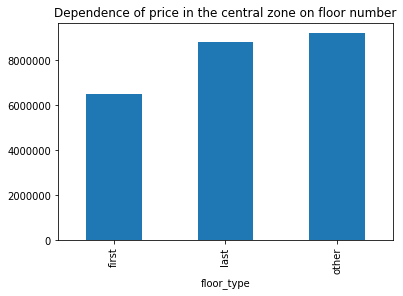

In [76]:
# assessing the impact of floor number on price in the central zone
stpb.groupby('floor_type')['last_price'].agg('median').plot(
    kind='bar', title = 'Dependence of price in the central zone on floor number')

First-floor apartments are cheaper than those on the other floors. Middle-floors apartments are the most expensive. 

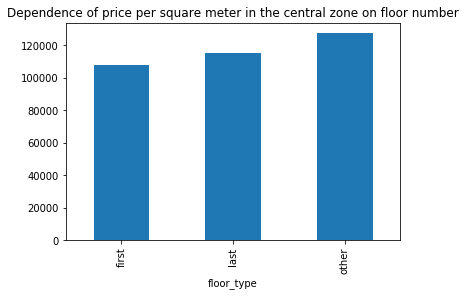

In [77]:
# assessing the impact of floor number on price per square meter in the central zone
stpb.groupby('floor_type')['square_meter_price'].agg('median').plot(
    kind='bar', title = 'Dependence of price per square meter in the central zone on floor number')

Compared to the other floors, the first floor has a lower price per square meter, while the middle floor has the highest. 

Correlation of price in the central zone and distance from the center:
                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000   -0.053286
last_price                     -0.053286    1.000000


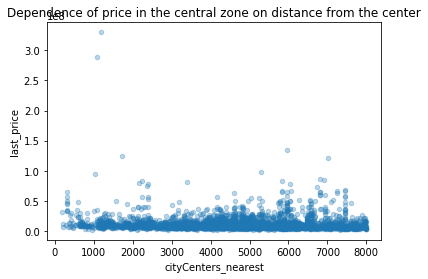

In [78]:
# assessing the impact of distance from the center on price in the central zone
stpb.plot(
    x = 'cityCenters_nearest', 
    y = 'last_price', 
    kind = 'scatter', 
    title = 'Dependence of price in the central zone on distance from the center', 
    alpha = 0.3
)
print('Correlation of price in the central zone and distance from the center:')
print(stpb[['cityCenters_nearest', 'last_price']].corr())

In the central zone, as you move away from the center, prices increase slightly. 

Correlation of price per square meter in the central zone and distance from the center:
                     cityCenters_nearest  square_meter_price
cityCenters_nearest             1.000000           -0.005616
square_meter_price             -0.005616            1.000000


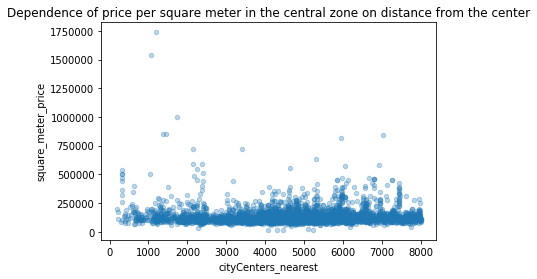

In [79]:
# assessing the impact of distance from the center on price per square meter in the central zone
stpb.plot(
    x = 'cityCenters_nearest', 
    y = 'square_meter_price', 
    kind = 'scatter', 
    title = 'Dependence of price per square meter in the central zone on distance from the center', 
    alpha = 0.3)
print('Correlation of price per square meter in the central zone and distance from the center:')
print(stpb[['cityCenters_nearest', 'square_meter_price']].corr())

As you move away from the center, prices per square meter increase slightly.

Correlation of price in the central zone and day of placement:
             weekday  last_price
weekday     1.000000   -0.008341
last_price -0.008341    1.000000


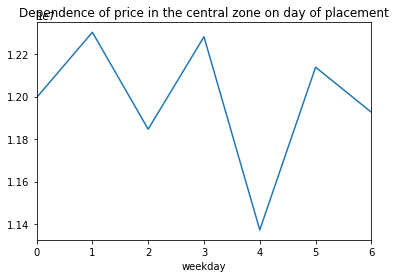

In [80]:
# assessing the impact of day of placement on price in the central zone
stpb.groupby('weekday')['last_price'].agg('mean').plot(
    title='Dependence of price in the central zone on day of placement')
print('Correlation of price in the central zone and day of placement:')
print(stpb[['weekday', 'last_price']].corr())

On Saturday, the most expensive apartments are published, and on Sunday, the cheapest.

Correlation of price per square meter in the central zone and day of placement
                     weekday  square_meter_price
weekday             1.000000           -0.001151
square_meter_price -0.001151            1.000000


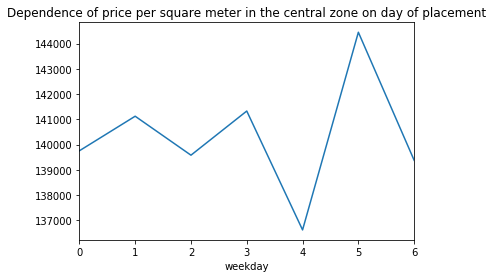

In [81]:
# assessing the impact of day of placement on price per square meter in the central zone
stpb.groupby('weekday')['square_meter_price'].agg('mean').plot(
    title='Dependence of price per square meter in the central zone on day of placement')
print('Correlation of price per square meter in the central zone and day of placement')
print(stpb[['weekday', 'square_meter_price']].corr())

On Saturday, the most expensive apartments are published, and on Sunday, the cheapest.

Correlation of price in the central zone and month of placement
               month  last_price
month       1.000000   -0.018042
last_price -0.018042    1.000000


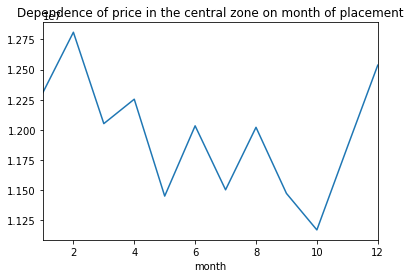

In [82]:
# assessing the impact of month of placement on price in the central zone
stpb.groupby('month')['last_price'].agg('mean').plot(
    title='Dependence of price in the central zone on month of placement')
print('Correlation of price in the central zone and month of placement')
print(stpb[['month', 'last_price']].corr())

The most expensive apartments are published in February, the cheapest in October.

Correlation of price per square meter in the central zone and month of placement
                       month  square_meter_price
month               1.000000           -0.019805
square_meter_price -0.019805            1.000000


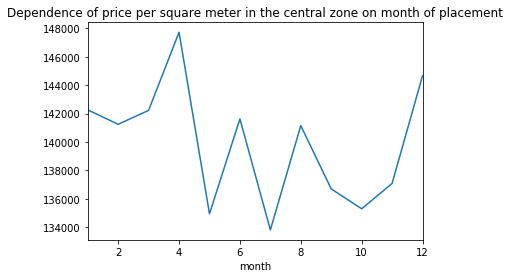

In [83]:
# assessing the impact of month of placement on price per square meter in the central zone
stpb.groupby('month')['square_meter_price'].agg('mean').plot(
    title='Dependence of price per square meter in the central zone on month of placement')
print('Correlation of price per square meter in the central zone and month of placement')
print(stpb[['month', 'square_meter_price']].corr())

The most expensive apartments are published in April, the cheapest in July.

Correlation of price in the central zone and year of placement
                year  last_price
year        1.000000   -0.021319
last_price -0.021319    1.000000


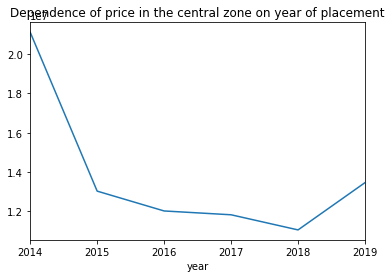

In [84]:
# assessing the impact of year of placement on price in the central zone
stpb.groupby('year')['last_price'].agg('mean').plot(
    title='Dependence of price in the central zone on year of placement')
print('Correlation of price in the central zone and year of placement')
print(stpb[['year', 'last_price']].corr())

In 2014-2018, apartment prices fell significantly. In 2019, prices began to rise again.

Correlation of price per square meter in the central zone and year of placement
                        year  square_meter_price
year                1.000000            0.037835
square_meter_price  0.037835            1.000000


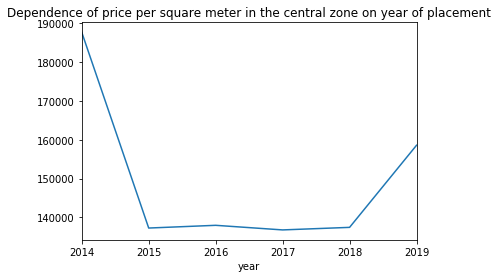

In [85]:
# assessing the impact of year of placement on price per square meter in the central zone
stpb.groupby('year')['square_meter_price'].agg('mean').plot(
    title='Dependence of price per square meter in the central zone on year of placement')
print('Correlation of price per square meter in the central zone and year of placement')
print(stpb[['year', 'square_meter_price']].corr())

In 2014-2018, apartment prices fell significantly. In 2019, prices began to rise again.

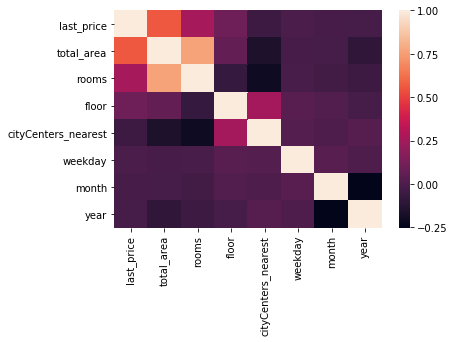

In [86]:
# visualizing correlation with a heatmap
saint_p = stpb[['last_price', 'total_area', 'rooms', 'floor', 'cityCenters_nearest', 'weekday', 'month', 'year']]
correlation = saint_p.corr()
sns.heatmap(correlation)

In the graph the price is influenced most by the total area. Then by the number of rooms and floors. The distance from the center, the day, month and year of placement have little effect on the prices.

The cost of an apartment in the center increases as the number of rooms increases. However, the price per square decreases as the number of rooms increases. The lowest price per square is observed in apartments with 5 rooms. An apartment with 6 rooms has a higher price per square.

The first floor of apartments in the center is cheaper than the other floors. The middle floors have the highest prices.

In the central zone, as you move away from the center, prices increase slightly. Probably, there is more demand on modern buildings than on historical buildings in the center.

In the center, the cost of apartments published on Saturday and in February is much higher. The cheapest apartments are published on Sunday and in October.

Prices of apartments fell dramatically between 2014 and 2018. In 2019, prices began to rise again.

The price is most heavily influenced by the total area. Then by the number of rooms and floors. The distance from the center and the day, month and year of publication have virtually no impact.

## Final conclusion

In general, there are 1, 2, and 3 bedroom apartments on the market, which have an area of less than 100 square meters, ceiling heights ranging  from 2.5 to 3 meters and cost about 6 million.

The average apartment is sold in 95 days. If it sells in less than 45 days, it is fast, but if it sells in more than 200 days, it is slow.

In general, the price of an apartment is determined more by the size of the apartment than the number of rooms. The price of an apartment on the first floor is much more affordable than the other options. Also, apartments on the top floor are cheaper than the others, except for the first apartment on the top floor.

St. Petersburg has the highest average cost per square meter.

Compared to the city as a whole, apartments in the center (the border of the central zone is 7km or less) have an average area of 15 meters.

Apartments in the center are much more expensive than in the city. On average, the cost 2.7-3.4 million.

In the center, the price is most dependent on the total area and then on the number of rooms and floors. Distance from the center has little effect on the prices.

The first floor in the center is much cheaper than the other options, and the top floor is almost the same price as the other floors.